<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Numerical Linear Algebra

Numerical methods for linear algebra problems lies at the heart of many numerical approaches and is something we will spend some time on.  Roughly we can break down probablems that we would like to solve into two general problems, solving a system of equations

$$A x = b$$

and solving the eigenvalue problem

$$A v = \lambda v.$$

We will take each in turn, evaluate some of the fundamental properties and methods for solving these problems, and gain some understanding of when they fail.



## General Problem Specification

Before we dive in lets consider some of the pivotal problems that numerical methods for linear algebra tries to address.  

For this discussion we will be using the common notation $m \times n$ to denote the dimensions of a matrix $A$.  The $m$ refers to the number of rows and $n$ the number of columns.  If a matrix is square, i.e. $m = n$, then we will use the notation that $A$ is $m \times m$.

### Systems of Equations

We have $m$ equations for $m$ unknowns.

$$A x = b$$

#### Example: Vandermonde Matrix

We have data $(x_i, y_i), ~~ i = 1, 2, \ldots, m$ that we want to fit a polynomial of order $m-1$.  Sovling the linear system $A p = y$ does this for us where

$$A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{m-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{m-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{m-1}
\end{bmatrix} ~~~~~ y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}$$

and $p$ are the coefficients of the interpolating polynomial $\mathcal{P}_N(x) = p_0 + p_1 x + p_2 x^2 + \cdots + p_m x^{m-1}$.

#### Example: Linear least squares 1

In a similar case as above, say we want to fit a paritcular function (could be a polynomial) to a given number of data points except in this case we have more data points than free parameters.  In the case of polynomials this could be the same as saying we have $m$ data points but only want to fit a $n$th order polynomial through the data where $n \leq m - 1$.  One of the common approaches to this problem is to minimize the "least-squares" error between the data and the resulting function:

$$E = \left( \sum^m_{i=1} |y_i - f(x_i)|^2 \right )^{1/2}.$$

But how do we do this if our matrix $A$ is now $m \times n$ and looks like

$$A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{n}
\end{bmatrix}?$$

Turns out if we solve the system

$$A^T A x = A^T b$$

we can gaurantee that the error is minimized in the least-squares sense.

#### Example:  Linear least squares 2

Try and fit a line through the data points

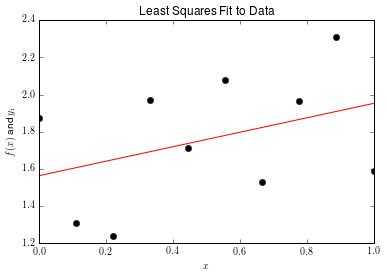

In [3]:
# Linear Least Squares Problem

x = numpy.array([        0.0, 0.11111111, 0.22222222, 0.33333333, 0.44444444, 
                  0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.0])
y = numpy.array([ 1.87498549,  1.31037444,  1.23798973,  1.96912525,  1.7150103 ,
                  2.07664549,  1.53174786,  1.96478464,  2.31023704,  1.59167973])

A = numpy.ones((x.shape[0], 2))
A[:, 1] = x
p = numpy.linalg.lstsq(A, y)[0]

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(x, y, 'ko')
axes.plot(x, p[0] + p[1] * x, 'r')
axes.set_title("Least Squares Fit to Data")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$ and $y_i$")

plt.show()

### Eigenproblems

Eigenproblems come up in a variety of contexts and often are integral to many problem of scientific and engineering interest.  As a review, if $A \in \mathbb{C}^{m\times m}$ (a square matrix with complex values), a non-zero vector $v\in\mathbb{C}^m$ is an **eigenvector** of $A$ with a corresponding **eigenvalue** $\lambda \in \mathbb{C}$ if 

$$A v = \lambda v.$$

One way to interpret the eigenproblem is that we are attempting to ascertain the "action" of the matrix $A$ on some subspace of $\mathbb{C}^m$ where this action acts like scalar multiplication.  This subspace is called an **eigenspace**.

#### Example

Compute the eigenspace of the matrix

$$A = \begin{bmatrix}
    1 & 2 \\
    2 & 1
\end{bmatrix}$$

Recall that we can find the eigenvalues of a matrix by computing $\det(A - \lambda I) = 0$.  In this case we have

$$\begin{aligned}
    A - \lambda I &= \begin{bmatrix}
        1 & 2 \\
        2 & 1
    \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \lambda\\
    &= \begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix}
\end{aligned}$$

whose determinant is

$$\begin{aligned}
\begin{vmatrix}
    1 - \lambda & 2 \\
    2 & 1 - \lambda
\end{vmatrix} &= (1 - \lambda) (1 - \lambda) - 2 \cdot 2 \\
&= 1 - 2 \lambda + \lambda^2 - 4 \\
&= \lambda^2 - 2 \lambda - 3.
\end{aligned}$$

Setting this equal to zero we can find the eigenvalues as

$$\begin{aligned}
\lambda &= \frac{2 \pm \sqrt{4 - 4 \cdot 1 \cdot (-3)}}{2} \\
&= 1 \pm 2 \\
&= [-1, 3]
\end{aligned}$$

The eigenvectors then can be found by rearranging the equation to $(A - \lambda I) v = 0$ and solving for each vector.  A trick that works most of the time is to normalize each vector such that the first entry is 1 ($v_1 = 1$):

$$\begin{bmatrix}
        1 - \lambda & 2 \\
        2 & 1 - \lambda
    \end{bmatrix} \begin{bmatrix} 1 \\ v_2 \end{bmatrix} = 0
$$

$$\begin{aligned}
    1 - \lambda + 2 v_2 &= 0 \\
    v_2 &= \frac{\lambda - 1}{2}
\end{aligned}$$

and just to make sure

$$\begin{aligned}
    2 + \left(1- \lambda \frac{\lambda - 1}{2}\right) & = 0\\
    (\lambda - 1)^2 - 4 &=0
\end{aligned}$$

which by design is satisfied by our eigenvalues.  Another sometimes easier approach is to plug-in the eigenvalues to find each corresponding eigenvector.  The eigenvectors are therefore

$$v = \begin{bmatrix}1 \\ -1 \end{bmatrix}, \begin{bmatrix}1 \\ 1 \end{bmatrix}.$$

Note that these are linearly independent.

## Fundamentals

### Matrix-Vector Multiplication

One of the most basic operations we can perform with matrices is to multiply them be a vector.  This matrix-vector product $A x = b$ is defined as

$$b_i = \sum^n_{j=1} a_{ij} x_j ~~~~~ \text{where}~~~~ i = 1, \ldots, m$$

Writing the matrix-vector product this way we see that one interpretation of this product is that each column of $A$ is weighted by the value $x_j$, or in other words $b$ is a linear combination of the columns of $A$ where each column's weighting is $x$.

$$
    \begin{bmatrix} ~ \\ ~ \\ b \\ ~ \\ ~ \end{bmatrix} = 
    \begin{bmatrix} ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~  \\ a_1 & a_2 & \cdots & a_n \\ ~ & ~ & ~ & ~  \\ ~ & ~ & ~ & ~ \end{bmatrix}
    \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} = x_1 \begin{bmatrix} ~ \\ ~ \\ a_1 \\ ~ \\ ~ \end{bmatrix} + x_2 \begin{bmatrix} ~ \\ ~ \\ a_2 \\ ~ \\ ~ \end{bmatrix} + \cdots + x_n \begin{bmatrix} ~ \\ ~ \\ a_n \\ ~ \\ ~ \end{bmatrix}
$$

This view will be useful later when we are trying to interpret various types of matrices.

One important property of the matrix-vector product is that is a **linear** operation, also known as a **linear operator**.  This means that the for any $x, y \in \mathbb{C}^n$ and any $c \in \mathbb{C}$ we know that

1. $A (x + y) = Ax + Ay$
1. $A\cdot (cx) = c A x$

#### Example:  Vandermonde Matrix

In the case where we have $m$ data points and want $m - 1$ order polynomial interpolant the matrix $A$ is a square $m \times m$ matrix as before.  Using the above interpretation the polynomial coefficients $p$ are the weights for each of the monomials that give exactly the $y$ values of the data.

#### Example:  Numerical matrix-vector multiply

Write a matrix-vector multiply function and check it with the appropriate `numpy` routine.  Also verify the linearity of the matrix-vector multiply.

In [4]:
def matrix_vector_product(A, x):
    b = numpy.zeros((A.shape[0]))
    for i in xrange(A.shape[0]):
        for j in xrange(A.shape[1]):
            b[i] += A[i, j] * x[j]
    return b


m = 4
n = 3
A = numpy.random.uniform(size=(m,n))
x = numpy.random.uniform(size=(n))
y = numpy.random.uniform(size=(n))
c = numpy.random.uniform()
b = matrix_vector_product(A, x)
print numpy.allclose(b, numpy.dot(A, x))
print numpy.allclose(matrix_vector_product(A, (x + y)), matrix_vector_product(A, x) + matrix_vector_product(A, y))
print numpy.allclose(matrix_vector_product(A, c * x), c*matrix_vector_product(A, x))

True
True
True


### Matrix-Matrix Multiplication

The matrix product with another matrix $A C = B$ is defined as
$$
    b_{ij} = \sum^m_{k=1} a_{ik} c_{kj}.
$$
Again, a useful interpretation of this operation is that the product result $B$ is the a linear combination of the columns of $A$.

What are the dimensions of $A$ and $C$ so that the multiplication works?

#### Example:  Outer Product

The product of two vectors $u \in \mathbb{C}^m$ and $v \in \mathbb{C}^n$ is a $m \times n$ matrix where the columns are the vector $u$ multiplied by the corresponding value of $v$:
$$
    \begin{bmatrix} ~ \\ ~ \\ u \\ ~ \\ ~ \end{bmatrix} \begin{bmatrix} v_1 & v_2 & \cdots \\ v_n \end{bmatrix} =
    \begin{bmatrix} ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~ \\ v_1 u & v_2 u & \cdots & v_n u \\ ~ & ~ & ~ & ~ \\ ~ & ~ & ~ & ~  \end{bmatrix} = \begin{bmatrix} v_1u_1 & \cdots & v_n u_1 \\ \vdots & ~ & \vdots \\ v_1 u_m & \cdots & v_n u_m \end{bmatrix}
$$

#### Example:  Upper Triangular Multiplication

Consider the multiplication of a matrix $A \in \mathbb{C}^{m\times n}$ and the **upper-triangular** matrix $R$ defined as the $n \times n$ matrix with entries $r_{ij} = 1$ for $i \leq j$ and $r_{ij} = 0$ for $i > j$.  The product can be written as
$$
    \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ b_1 & \cdots & b_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix} = \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ a_1 & \cdots & a_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix} \begin{bmatrix} 1 & \cdots & 1 \\ ~ & \ddots & \vdots \\ ~ & ~ & 1 \end{bmatrix}.
$$

The columns of $B$ are then
$$
    b_j = A r_j = \sum^j_{k=1} a_k
$$
so that $b_j$ is the sum of the first $j$ columns of $A$.

#### Example: Write Matrix-Matrix Multiplication

Write a function that compute matrix-matrix multiplication and again demonstrates the following properties:
1. $A (B + C) = AB + AC$ (for square matrices))
1. $A (cB) = c AB$ where $c \in \mathbb{C}$
1. $AB \neq BA$ in general

In [5]:
def matrix_matrix_product(A, B):
    C = numpy.zeros((A.shape[0], B.shape[1]))
    for i in xrange(A.shape[0]):
        for j in xrange(B.shape[1]):
            for k in xrange(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C


m = 4
n = 4
p = 4
A = numpy.random.uniform(size=(m, n))
B = numpy.random.uniform(size=(n, p))
C = numpy.random.uniform(size=(m, p))
c = numpy.random.uniform()
print numpy.allclose(matrix_matrix_product(A, B), numpy.dot(A, B))
print numpy.allclose(matrix_matrix_product(A, (B + C)), matrix_matrix_product(A, B) + matrix_matrix_product(A, C))
print numpy.allclose(matrix_matrix_product(A, c * B), c*matrix_matrix_product(A, B))
print numpy.allclose(matrix_matrix_product(A, B), matrix_matrix_product(B, A))

True
True
True
False


### Range and Null-Space

The **range** of a matrix (similar to any function), denoted as $\text{range}(A)$, is the set of vectors that can be expressed as $A x$ for some $x$.  We can also then say that that $\text{range}(A)$ is the space **spanned** by the columns of $A$.  In other words the columns of $A$ provide a basis for $\text{range}(A)$, also called the **column space** of the matrix $A$.  Similarly the **null-space** of a matrix $A$, denoted $\text{null}(A)$ is the set of vectors $x$ that satisfy $A x = 0$.

A similar concept is the **rank** of the matrix $A$, denoted as $\text{rank}(A)$, is the dimension of the column space.  A matrix $A$ is said to have **full-rank** if $\text{rank}(A) = \min(m, n)$.  This property also implies that the matrix mapping is **one-to-one**.

### Inverse

A **non-singular** or **invertible** matrix is characterized as a matrix with full-rank.  This is related to why we know that the matrix is one-to-one, we can use it to transform a vector $x$ and using the inverse, denoted $A^{-1}$, we can map it back to the original matrix.  The familiar definition of this is
\begin{align*}
    A x &= b \\
    A^{-1} A x & = A^{-1} b \\
    x &=A^{-1} b
\end{align*}
where here $b$ is in the column space of $A$.

There are a number of important properties of a non-singular matrix A.  Here we list them as the following equivalent statements
1. $A$ has an inverse $A^{-1}$
1. $\text{rank}(A) = m$
1. $\text{range}(A) = \mathbb{C}^m$
1. $\text{null}(A) = {0}$
1. 0 is not an eigenvalue of $A$
1. $\text{det}(A) \neq 0$

#### Example:  Properties of invertible matrices

Show that given an invertible matrix that the rest of the properties hold.  Make sure to search the `numpy` packages for relevant functions.

In [6]:
m = 3
for n in xrange(100):
    A = numpy.random.uniform(size=(m, m))
    if numpy.linalg.det(A) != 0:
        break
        
print numpy.dot(numpy.linalg.inv(A), A)
print numpy.linalg.matrix_rank(A)
print "range"
print numpy.linalg.solve(A, numpy.zeros(m))
print numpy.linalg.eigvals(A)

[[  1.00000000e+00   0.00000000e+00  -1.11022302e-16]
 [ -4.44089210e-16   1.00000000e+00   0.00000000e+00]
 [  2.22044605e-16   2.22044605e-16   1.00000000e+00]]
3
range
[ 0.  0.  0.]
[ 1.54248933 -0.31991532  0.11452118]


### Orthogonal Vectors and Matrices

Orthogonality is a very important concept in linear algebra that forms the basis of many of the modern methods used in numerical computations.  Two vectors are said to be orthogonal if their **inner-product** or **dot-product** defined as
$$
    < x, y > = (x, y) = x \cdot y = \sum^m_{i=1} x_i y_i
$$
where here we have shown the various notations you may run into (the inner-product is in-fact a general term for a similar operation for mathematical objects such as functions).  If $<x,y> = 0$ then we say $x$ and $y$ are orthogonal.  The reason we use this terminology is that the inner-product of two vectors can also be written in terms of the angle between them where
$$
    \cos \theta = \frac{< x, y >}{||x||~||y||}
$$
where $||x||$ is the Euclidean norm of the vector $x$.  We can write this in terms of the inner-product as well as
$$
    ||x||^2 = < x, x > = \sum^m_{i=1} |x_i|^2.
$$
The generalization of the inner-product to complex spaces is defined as
$$
    < x, y > = \sum^m_{i=1} x_i^* y_i
$$
where $x_i^*$ is the complex-conjugate of the value $x_i$.

Taking this idea one step further we can say a set of vectors $x \in X$ are orthogonal to $y \in Y$ if $\forall x,y$ $< x, y > = 0$.  If $\forall x,y$ $||x|| = 1$ and $||y|| = 1$ then they are also called orthonormal.

Another concept that is related to orthogonality is linear-independence.  A set of vectors $x \in X$ are **linearly independent** if $\forall x \in X$ that each $x$ cannot be written as a linear combination of the other vectors in the set $X$.  An equivalent statement is that there does not exist a set of scalars $c_i$ such that
$$
    x_k = \sum^n_{i=1, i \neq k} c_i x_i
$$
is true.  Another way to write this is that $x_k$ is orthogonal to all the rest of the vectors in the set $X$.  This can be related directly through the idea of projection.  If we have a set of vectors $x \in X$ we can project another vector $v$ onto the vectors in $X$ by using the inner-product.  This is especially powerful if we have a set of linearly-independent vectors $X$, which are said to **span** a space (or provide a **basis** for a space), s.t. any vector in the space spanned by $X$ can be expressed as a linear combination of the basis vectors $X$
$$
    v = \sum^n_{i=1} < v, x_i > x_i.
$$

Looping finally back to matrices, the column space of a matrix is spanned by its linearly independent columns.  Any vector $v$ in the column space can therefore be expressed via the equation above.  A special class of matrices called **unitary** matrices when complex-valued and **orthogonal** when purely real-valued if the columns of the matrix are orthonormal to each other.  Importantly this implies that for a unitary matrix $Q$ we know the following

1. $Q^* = Q^{-1}$
1. $Q^*Q = I$

where $Q^*$ is the **adjoint** of $Q$ defined as the transpose of the original matrix with the entries being the complex conjugate of each entry.  As an example if we have the matrix
\begin{align*}
    Q &= \begin{bmatrix} q_{11} & q_{12} \\ q_{21} & q_{22} \\ q_{31} & q_{32} \end{bmatrix} ~~~~ \text{then} \\
    Q^* &= \begin{bmatrix} q^*_{11} & q^*_{21} & q^*_{31} \\ q^*_{12} & q^*_{22} & q^*_{32} \end{bmatrix}
\end{align*}
The important part of being an unitary matrix is that the projection onto the column space of the matrix $Q$ preserves geometry in an Euclidean sense.

### Vector Norms

Norms (and also measures but let's not get too deep into that) provide a means for measure the "size" or distance in a space.  In general a norm is a function, denoted by $||\cdot||$, that maps $\mathbb{C}^m \rightarrow \mathbb{R}$.  In other words we stick in a multi-valued object and get a single, real-valued number out the other end.  All norms satisfy the properties:

1. $||x|| \geq 0$, and $||x|| = 0$ only if $x = 0$
1. $||x + y|| \leq ||x|| + ||y||$ (triangle inequality)
1. $||c x|| = |c| ||x||$ where $c \mathbb{C}$

There are a number of relevant norms that we can define beyond the Euclidean norm, also know as the 2-norm or $\ell_2$ norm:

1. $||x||_1 = \sum^m_{i=1} |x_i|$, called the $\ell_1$ norm
1. $||x||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2}$, called the $\ell_2$ norm
1. $||x||_p = \left( \sum^m_{i=1} |x_i|^p \right)^{1/p}$, where $1 \leq p < \infty$, called the $\ell_p$ norm
1. $||x||_\infty = \max |x_i|$, $\ell_\infty$ norm
1. $||x||_{W_p} = \left( \sum^m_{i=1} |w_i x_i|^p \right)^{1/p}$, where $1 \leq p < \infty$, called the weighted $\ell_p$ norm

These are also related to other norms denoted by capital letters ($L_2$ for instance).  In this case we use the lower-case notation to denote finite or discrete versions of the infinite dimensional counterparts.

#### Example:  Comparisons Between Norms

Compute the norms given some vector $x$ and compare their values.  Verify the properties of the norm for one of the norms.

In [7]:
m = 10
p = 4
x = numpy.random.uniform(size=m)

ell_1 = 0.0
for i in xrange(m):
    ell_1 += numpy.abs(x[i])
    
ell_2 = 0.0
for i in xrange(m):
    ell_2 += numpy.abs(x[i])**2
ell_2 = numpy.sqrt(ell_2)

ell_p = 0.0
for i in xrange(m):
    ell_p += numpy.abs(x[i])**p
ell_p = (ell_2)**(1.0 / p)

ell_infty = numpy.max(numpy.abs(x))

print ell_1, ell_2, ell_p, ell_infty

y = numpy.random.uniform(size=m)
print numpy.max(numpy.abs(x + y)), numpy.max(numpy.abs(x)) + numpy.max(numpy.abs(y))
print numpy.max(numpy.abs(0.1 * x)), 0.1 * numpy.max(numpy.abs(x))

3.53142054289 1.33137354063 1.07417485131 0.849380848354
1.28388962363 1.79060127591
0.0849380848354 0.0849380848354


### Matrix Norms

The most direct way to consider a matrix norm is those induced by a vector-norm.  Given a vector norm, we can define a matrix norm as the smallest number $C$ that satisfies the inequality
$$
    ||A x||_{m} \leq C ||x||_{n}.
$$
or as the supremum of the ratios so that
$$
    C = \sup_{x\in\mathbb{C}^n ~ x\neq0} \frac{||A x||_{m}}{||x||_n}.
$$

Noting that $||A x||$ lives in the column space and $||x||$ on the domain we can think of the matrix norm as the "size" of the matrix that maps the domain to the range.  Also noting that if $||x||_n = 1$ we also satisfy the condition we can write the induced matrix norm as
$$
    ||A||_{(m,n)} = \sup_{x \in \mathbb{C}^n ~ ||x||_{n} = 1} ||A x||_{m}.
$$

#### Example: Induced Matrix Norms

Consider the matrix
$$
    A = \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix}.
$$
Compute the induced-matrix norm of $A$ for the vector norms $\ell_2$ and $\ell_\infty$.

1. For both of the requested norms the unit-length vectors $[1, 0]$ and $[0, 1]$ can be used to determine the bounds on the matrix norms in each case.  $||A||_2 = \sup_{x \ in \mathbb{R}^n} \left( ||A \cdot [1, 0]^T||_2, ||A \cdot [0, 1]^T||_2 \right )$  computing each of the norms we have
\begin{align*}
    \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
    \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix} &= \begin{bmatrix} 2 \\ 2 \end{bmatrix}
\end{align*}
which translates into the norms $||A \cdot [1, 0]^T||_2 = 1$ and $||A \cdot [0, 1]^T||_2 = 2 \sqrt{2}$.  This implies that the $\ell_2$ induced matrix norm of $A$ is at least $||A||_{2} = 2 \sqrt{2}$.

  Turns out that $||A||_2 = \sqrt{\rho(A^\ast A)}$ where $\rho(B)$ is the spectral radius defined as
$$
    \rho(B) = \max_{i} |\lambda_i|,
$$
i.e. the maximum absolute value of the eigenvalues of $B$.  Computing the norm again here we find
$$
    A^\ast A = \begin{bmatrix} 1 & 0 \\ 2 & 2 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 0 & 2 \end{bmatrix} = \begin{bmatrix} 1 & 2 \\ 2 & 8 \end{bmatrix}
$$
which has eigenvalues 
$$
    \lambda = \frac{1}{2}\left(9 \pm \sqrt{65}\right )
$$
so $||A||_2 \approx 2.9208096$.

1. We can again bound $||A||_\infty$ by looking at the unit vectors which give us the matrix lower bound of 2.  To compute it turns out $||A||_{\infty} = \max_{1 \leq i \leq m} ||a^\ast_i||_1$ where $a^\ast_i$ is the $i$th row of $A$.  This represents then the maximum of the row sums of $A$.  Therefore $||A||_\infty = 3$.

#### Example: General  Norms of a Matrix

Compute a bound on the induced norm of the $m \times n$ dimensional matrix $A$ using $\ell_1$ and $\ell_2$

One of the most useful ways to think about matrix norms is as a transformation of a unit-ball to an ellipse.  Depending on the norm in question, the norm will be some combination of the resulting ellipse.  For the above cases we have some nice relations based on these ideas.

1. $||A x||_1 = || \sum^n_{j=1} a_j x_j ||_1 \leq \sum^n_{j=1} |x_j| ||a_j||_1 \leq \max_{1\leq j\leq n} ||a_j||_1$
1. $||A x||_\infty = || \sum^n_{j=1} a_j x_j||_\infty \leq \sum^n_{j=1} |x_j| ||a_j||_\infty \leq \max_{1 \leq i \leq m} ||a_i||_1$

#### Cauchy-Schwarz and Hölder Inequalities

Computing matrix norms where $p \neq 1$ or $\infty$ is more difficult unfortunately.  We fortunately have a couple of tools that can be useful.  

**Cauchy-Schwarz Inequality**:  For the special case where $p=q=2$, for any vectors $x$ and $y$
$$
    |x^*y| \leq ||x||_2 ||y||_2
$$

**Hölder's Inequality**:  Turns out this holds in general if given a $p$ and $q$ that satisfy $1/p + 1/q = 1$ with $1 \leq p, q \leq \infty$
$$
    |x^*y| \leq ||x||_p ||y||_q.
$$

#### General Matrix Norms (non-induced)

In general matrix-norms have the following properties whether they are induced from a vector-norm or not:
1. $||A|| \geq 0$ and $||A|| = 0$ only if $A = 0$
1. $||A + B|| \leq ||A|| + ||B||$ (Triangle Inequality)
1. $||c A|| = |c| ||A||$

The most widely used matrix norm not induced by a vector norm is the **Frobenius norm** defined by
$$
    ||A||_F = \left( \sum^m_{i=1} \sum^n_{j=1} |A_{ij}|^2 \right)^{1/2}.
$$

#### Invariance under unitary multiplication

One important property of the matrix 2-norm (and Forbenius norm) is that multiplication by a unitary matrix does not change the product (kind of like multiplication by 1).  In general for any $A \in \mathbb{C}^{m\times n}$ and unitary matrix $Q \in \mathbb{C}^{m \times m}$ we have
\begin{align*}
    ||Q A||_2 &= ||A||_2 \\ ||Q A||_F &= ||A||_F.
\end{align*}

## QR Factorizations and Least Squares

### Projections

A **projector** is a square matrix $P$ that satisfies
$$
    P^2 = P.
$$
A projector comes from the idea that we want to project a vector $v$ onto a lower dimensional subspace.  Of course if $v$ lies completely within this subspace, i.e. $v \in \text{range}(P)$ then $P v = v$.  This motivates the definition above.  Take for instance a vector $x \notin \text{range}(P)$ and project it onto the subspace $Px = v$.  If we apply the projection again to $v$ now we have
\begin{align*}
    Px &= v \\
    P^2 x & = Pv = v \Rightarrow \\
    P^2 = P.
\end{align*}
It is also important to keep in mind the following, given again $x \notin \text{range}(P)$, if we look at the difference between the projection and the original vector $Px - x$ and apply the projection again we have
$$
    P(Px - x) = P^2 x - Px = 0
$$
which means the difference between the projected vector $Px = v$ lies in the null space of $P$, $v \in \text{null}(P)$.

#### Complimentary Projectors

A projector also has a compliment defined as $I - P$.  We can show that again this a projector as
$$
    (I - P)^2 = I - IP - IP + P^2 = I - 2 P + P^2 = I - 2P - P = I - P.
$$

It turns out that the compliment projects exactly onto $\text{null}(P)$.  This can be shown by considering an $x \in \text{null}(P)$, then $P x = 0$ and therefore $(I - P) x = x$ implying that $x \in \text{range}(I - P)$.  We also know that $(I - P) x = x - Px \in \text{null}(P)$ as well.  This shows that the $\text{range}(I - P) \subseteq \text{null}(P)$ and $\text{range}(I - P) \supseteq \text{null}(P)$ implying that $\text{range}(I - P) = \text{null}(P)$ exactly.  

This result provides an important property of a projector and its compliment, namely that they divide a space into two subspaces whose intersection is $\text{range}(I - P) \cap \text{range}(P) = \{0\}$.  These two spaces are said to also be complimentary subspaces.

Another important consequence of this is that for any $P \in \mathbb C^{m \times m}$ we know that $P$ and its compliment split the space $\mathbb C^m$ into two pieces, say $S_1$ and $S_2$ spanned by the vectors $s_1$ and $s_2$.  Any $v \in \mathbb C^m$ then can be expressed as a linear combination of $s_1$ and $s_2$ via the projectors $P$ and $I - P$.  In other words if we want to split the vector $v$ up into pieces, one part say $v_1$ in the subspace $S_1$ and $v_2$ in the subspace $S_2$, we simply need to form the appropriate projector $P$ so that
\begin{align*}
    P v = v_1 ~~~~~~~ (I - P) v &= v_2 \Rightarrow \\
    v &= v_1 + v_2.
\end{align*}

#### Orthogonal Projectors

An **orthogonal projector** is one that projects onto a subspace $S_1$ that is orthogonal the complimentary subspace $S_2$ (this is also phrased that $S_1$ projects along a space $S_2$).  Note that we are only talking about the subspaces (and their basis), not the projectors!

An orthogonal projector $P$ also turns out to be **hermitian**, a matrix that has the property that $P^* = P$.  There is fact a theorem that states:

*A projector $P$ is orthogonal if and only if $P = P^\ast$.*

#### Projection with an Orthonormal Basis

We can also directly construct a projector that uses an orthonormal basis on the subspace $S_1$.  If we define another matrix $Q \in \mathbb C^{m \times n}$ which is unitary (its columns are orthonormal) we can construct an orthogonal projector as
$$
    P = Q Q^*.
$$
Note that the resulting matrix $P \in \mathbb C^{m \times m}$ as we require.  This means also that the dimension of the subspace $S_1$ is $n$.

**Example:  Construction of an orthonormal projector**

Take $\mathbb R^3$ and derive a projector that projects onto the x-y plane and is an orthogonal projector.

$$Q = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$$

$$Q Q^\ast = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}$$

$$P = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

**Example: Construction of a projector that eliminates a direction**

Say we are in $\mathbb C^m$ and we want to eliminate the component of a vector in one direction, say $q$.  We can do this by forming the projector that projects into that direction $P = q q^* \in \mathbb C^{m \times m}$.  The compliment will then include everything BUT that direction so that $I - P = I - q q^*$ gives us what we want.  This assumes that $||q|| = 1$, if this is not the case we can also generalize this to an arbitrary vector $v$ so that the correct projector is then
$$
    I - \frac{a a^\ast}{||a||} = I - \frac{a a^\ast}{a^\ast a}
$$
Note that differences in the resulting dimensions between the two values in the fraction.  Also note that as we saw with the outer product, the resulting $\text{rank}(q q^\ast) = 1$.

Try to construct a projector in $\mathbb R^3$ that projects onto the $x$-$y$ plane.

In [8]:
q = numpy.array([0, 0, 1])
P = numpy.outer(q, q.conjugate())
P_comp = numpy.identity(3) - P

x = numpy.array([3, 4, 5])
print numpy.dot(P, x)
print numpy.dot(P_comp, x)

a = numpy.array([0, 0, 3])
P = numpy.outer(a, a.conjugate()) / (numpy.dot(a, a.conjugate()))
P_comp = numpy.identity(3) - P
print numpy.dot(P, x)
print numpy.dot(P_comp, x)

[0 0 5]
[ 3.  4.  0.]
[0 0 5]
[ 3.  4.  0.]


### QR Factorization

One of the most important ideas in linear algebra is the concept of factorizing an original matrix into different constituents which may have various properties.  In numerical linear algebra one of the most important factorizations is the QR factorizations.  

The basic idea is that we want to break up $A$ into its successive spaces spanned by the columns of $A$.  If we have
$$
    A = \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ a_1 & \cdots & a_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix}
$$
then we want to construct the sequence
$$
    \text{span}(a_1) \subseteq \text{span}(a_1, a_2) \subseteq \text{span}(a_1, a_2, a_3) \subseteq \cdots \subseteq \text{span}(a_1, a_2, \ldots , a_n)
$$
where here $\text{span}(v_i)$ indicates the subspace spanned by the vectors $v_i$.  QR factorization attempts to construct a set of orthonormal vectors $q_i$ that span each of the subspaces, i.e. 
$$
    \text{span}(a_1, a_2, \ldots, a_j) = \text{span}(q_1, q_2, \ldots, q_j).
$$

Lets consider this for the first few vectors $q_i$.
1. For $\text{span}(a_1)$ we can directly use $a_1$ but normalize the vector such that
$$
    q_1 = \frac{a_1}{||a_1||}.
$$
2. For $\text{span}(a_1, a_2)$ we already have $q_1$ so we need to have a vector $q_2$ that is orthogonal to $q_1$, i.e.
$$
    \langle q_1, q_2 \rangle = q_1^* q_2 = 0
$$
and is again normalized.  We can accomplish this by modifying $a_2$ such that
$$
    q_2 = \frac{a_2 - \langle q_1, a_2\rangle}{||a_2 - \langle q_1, a_2\rangle||}.
$$
which we can show is orthogonal to $q_1$ as
\begin{align*}
    \langle q_1, q_2 \rangle &= \left(\langle  q_1, a_2 - \langle  q_1, a_2 \rangle \rangle \right) \frac{1}{||a_2 - \langle  q_1, a_2 \rangle||} \\
    &= \left(\langle  q_1, a_2 \rangle - \langle  q_1, a_2 \rangle\right) \frac{1}{||a_2 - \langle  q_1, a_2 \rangle||} \\
    &= 0.
\end{align*}

These results suggest then that we may have a matrix factorization that has the following form:
$$
    \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ a_1 & \cdots & a_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix} = 
    \begin{bmatrix} ~ & ~ &  \\ ~ & ~ &  \\ q_1 & \cdots & q_n \\ ~ & ~ &  \\ ~ & ~ & ~ \end{bmatrix}
    \begin{bmatrix} r_{11} & r_{12} & \cdots & r_{1n} \\ ~ & r_{22} & ~ & ~ \\ ~ & ~ & \ddots & \vdots \\ ~ & ~ & ~ & r_{nn} \end{bmatrix}.
$$
If write out as a matrix multiplication we have
\begin{align*}
    a_1 &= r_{11} q_1 \\
    a_2 &= r_{22} q_2 + r_{12} q_1 \\
    a_3 &= r_{33} q_3 + r_{23} q_2 + r_{13} q_1 \\
    &\vdots
\end{align*}
we can also identify at least the first couple of value of $r$ as
\begin{align*}
    r_{11} &= ||a_1|| \\
    r_{12} &= \langle q_1, a_2 \rangle \\
    r_{22} &= ||a_2 - r_{12} q_1||.
\end{align*}
It turns out we can generalize this as Gram-Schmidt orthogonalization.

### Gram-Schmidt Orthogonalization

As may have been suggestive we can directly construct the arrays $Q$ and $R$ via a process of successive orthogonalization.  We have already shown the first two iterations so lets not consider the $j$th iteration.  We want to subtract off the components of the vector $a_j$ in the direction of the $q_i$ vectors where $i=1,\ldots,j-1$.  This suggests that we define a vector $v_j$ such that
\begin{align*}
    v_j &= a_j - \langle q_1, a_j \rangle - \langle q_2, a_j \rangle - \cdots - \langle q_{j-1}, a_j \rangle \\
    &= a_j - \sum^{j-1}_{i=1} \langle q_i, a_j \rangle.
\end{align*}
We also need to normalize $v_j$ which allows to define the $j$th column of $Q$ as
\[
    q_j = \frac{a_j - \sum^{j-1}_{i=1} \langle q_i, a_j \rangle}{||a_j - \sum^{j-1}_{i=1} \langle q_i, a_j \rangle||}.
\]
We can also therefore discern what the entries of $R$ are as we can write the matrix multiplication as the sequence
\begin{align*}
    q_1 &= \frac{a_1}{r_{11}} \\
    q_2 &= \frac{a_2 - r_{12} q_1}{r_{22}} \\
    q_3 &= \frac{a_3 - r_{13} q_1 - r_{23} q_2}{r_{33}} \\
    &\vdots \\
    q_n &= \frac{a_n - \sum^{n-1}_{i=1} r_{in} q_i}{r_{nn}}
\end{align*}
leading us to define
\begin{equation*}
    r_{ij} = \left \{ \begin{aligned}
        &\langle q_i, a_j \rangle & &i \neq j \\
        &||a_j - \sum^{j-1}_{i=1} r_{ij} q_i || & &i = j
    \end{aligned} \right .
\end{equation*}

This is called the **classical Gram-Schmidt** iteration.  Turns out that the procedure above is unstable because of rounding errors introduced.

#### Full vs. Reduced QR
One other important distinction for the QR factorization is the **full QR factorization** versus the **reduced QR factorization** which we have been investigating above.  We can extend the matrix $Q$ so that $Q \in \mathbb C^{m\times m}$ and unitary requiring appending rows of zeros onto $R$ such that $R \in \mathbb C^{m \times n}$.  The important distinction between the two is that the additional columns of $Q$ that we have added actually provide an orthonormal basis that is orthogonal to $\text{range}(A)$.  In the case where $A$ is full ranked then they provide a basis for $\text{null}(A^\ast)$.

#### QR Existence and Uniqueness
Two important theorems exist regarding this algorithm which we state without proof:

*Every $A \in \mathbb C^{m \times n}$ with $m \geq n$ has a full QR factorization and therefore a reduced QR factorization.*

*Each $A \in \mathbb C^{m \times n}$ with $m \geq n$ of full rank has a unique reduced QR factorization $A = QR$ with $r_{jj} > 0$.*

In [9]:
# Implement Classical Gram-Schmidt Iteration

def classic_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    for j in xrange(n):
        v = A[:, j]
        for i in xrange(j - 1):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = numpy.linalg.norm(v, ord=2)
        Q[:, j] = v / R[j, j]
    return Q, R


m = 4
n = 3
A = numpy.random.normal(size=(m, n))
Q, R = classic_GS(A)
print A
print Q
print R
print numpy.dot(Q, R) - A

[[ 0.08200424 -0.08595048  0.21821317]
 [-0.02616346 -1.14909182  0.42199391]
 [-0.62607364  0.34554027 -0.31836604]
 [ 1.35333876  1.1209395   0.39743517]]
[[ 0.05490299 -0.05227196  0.39217267]
 [-0.0175168  -0.69883596  0.88501194]
 [-0.41916504  0.21014506 -0.22511886]
 [ 0.90607919  0.68171474 -0.11079697]]
[[ 1.49362085  0.          0.49814422]
 [ 0.          1.64429406  0.        ]
 [ 0.          0.          0.48668247]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -3.46944695e-18   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00]]


### Solving $Ax = b$ with QR

Suppose we want to solve the system $Ax = b$ where $A \in \mathbb C^{m \times m}$.  We can use $QR$ factorization to do this!  Say we have found the QR factorization of $A$, then
\begin{align*}
    A x &= b \\
    QR x & = b \\
    Q^\ast Q R x &= Q^\ast b \\
    R x &= Q^\ast b.
\end{align*}

How has this helped us?

#### Gram-Schmidt in Terms of Projections

To start lets rewrite classical Gram-Schmidt as a series of projections:
$$
    q_1 = \frac{P_1 a_1}{||P_1 a_1||}, ~~~~~ q_2 = \frac{P_2 a_2}{||P_2 a_2||}, ~~~~~ \cdots ~~~~~ q_n = \frac{P_n a_n}{||P_n a_n||}
$$
where the $P_i$ are orthogonal projectors onto the $q_1, q_2, \ldots, q_{i-1}$, in other words the compliment of $\text{span}(a_1, a_2, \ldots, a_{i-1})$.

How should we construct these projectors?

We saw before that we can easily construct an orthogonal projector onto the compliment of space by first constructing the projector onto the space itself via
$$
    \hat{Q}_{i-1} = \begin{bmatrix}
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~       \\
        q_1 & q_2 & \cdots & q_{i-1} \\ 
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}.
$$
Constructing the projection onto the space spanned by $q_1$ through $q_{i-1}$ is then
$$
    \hat{P}_{i-1} = \hat{Q}_{i-1} \hat{Q}^\ast_{i-1}
$$
and therefore the projections in Gram-Schmidt orthogonalization is
$$
    P_{i} = I - \hat{P}_{i-1} = I - \hat{Q}_{i-1} \hat{Q}^\ast_{i-1}.
$$


#### Modified Gram-Schmidt

We know will derive a modified version of the Gram-Schmidt algorithm that is more numerically stable.  Recall that the basic piece of the original algorithm was to take the inner product of $a_j$ and all the relevant $q_i$.  Using the rewritten version of Gram-Schmidt in terms of projections we then have
$$
    v_i = P_i a_i.
$$
This projection is of rank $m - (i - 1)$ as we know that the resulting $v_i$ are linearly independent by construction.  The modified version of Gram-Schmidt instead uses projections that are all of rank $m-1$.  To construct this projection remember that we can again construct the complement to a projection and perform the following sequence of projections
$$
    P_i = \hat{P}_{q_{i-1}} \hat{P}_{q_{i-2}} \cdots \hat{P}_{q_{2}} \hat{P}_{q_{1}}
$$
where $\hat{P}_{q_{i}}$ projects onto the complement of the space spanned by $q_i$.  Note that this performs mathematically the same job as $P_i a_i$ however each of these projectors are of rank $m - 1$.  This leads to the following set of calculations:
\begin{align*}
    1.~~ v^{(1)}_i &= a_i  \\
    2.~~ v^{(2)}_i &= \hat{P}_{q_1} v_i^{(1)} = v^{(1)}_i - q_1 q_1^\ast v^{(1)}_i \\
    3.~~ v^{(3)}_i &= \hat{P}_{q_2} v_i^{(2)} = v^{(2)}_i - q_2 q_2^\ast v^{(2)}_i \\
    & ~~ \vdots &~&\\
    i.~~ v^{(i)}_i &= \hat{P}_{q_{i-1}} v_i^{(i-1)} =  v_i^{(i-1)} - q_{i-1} q_{i-1}^\ast v^{(i-1)}_i
\end{align*}
The reason why this approach is more stable is that we are not projecting with a possibly arbitrarily low-rank projector, instead we only take projectors that are high-rank.

**Example: Implementation of modified Gram-Schmidt**
Implement the modified Gram-Schmidt algorithm checking to make sure the resulting factorization has the required properties.

In [10]:
# Implement Modified Gram-Schmidt Iteration
def mod_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    v = A.copy()
    for i in xrange(n):
        R[i, i] = numpy.linalg.norm(v[:, i], ord=2)
        Q[:, i] = v[:, i] / R[i, i]
        for j in xrange(i + 1, n):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), v[:, j])
            v[:, j] -= R[i, j] * Q[:, i]
    return Q, R


m = 4
n = 4
A = numpy.random.normal(size=(m, n))
print A
Q_mod, R_mod = mod_GS(A)
print R_mod
print "Modified = "
print numpy.dot(Q_mod, R_mod) - A

[[-0.97369944  1.5486792   0.71487063  0.02811839]
 [-1.90002601  0.10640225  0.28885925 -0.0253138 ]
 [-1.8140598  -0.3539455  -0.0271379   0.36413643]
 [ 2.89425075 -0.23573549  0.69921142 -1.13425054]]
[[ 4.02811243 -0.43452472  0.20555874 -0.97381907]
 [ 0.          1.54976309  0.69167817 -0.15731236]
 [ 0.          0.          0.75062618 -0.64104798]
 [ 0.          0.          0.          0.19114861]]
Modified = 
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -6.93889390e-18]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.38777878e-17]
 [  0.00000000e+00   0.00000000e+00  -3.46944695e-18   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.22044605e-16]]


### Householder Triangularization

One way to also interpret Gram-Schmidt orthogonalization is as a series of multiplications by upper triangular matrices of the matrix A.  For instance the first step in performing the first step in the modified algorithm is to divide through by the norm $r_{11} = ||v_1||$ to give $q_1$:
$$
    \begin{bmatrix}
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~ \\
        v_1 & v_2 & \cdots & v_n \\
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
    \begin{bmatrix}
        \frac{1}{r_{11}}   & 0 &\cdots & ~      \\
        ~   & 1   & ~         \\
        ~ & ~ & \ddots & ~ \\ 
        ~   & ~   & ~ & 1 
    \end{bmatrix} = 
    \begin{bmatrix}
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~       \\
        q_1 & v_2 & \cdots & v_n \\ 
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
$$
We can also perform all the step (2) evaluations by also combining the step that projects onto the complement of $q_1$ by add the appropriate values to the entire first row:
$$
    \begin{bmatrix}
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~ \\
        v_1 & v_2 & \cdots & v_n \\
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
    \begin{bmatrix}
        \frac{1}{r_{11}}   & -\frac{r_{12}}{r_{11}} & -\frac{r_{13}}{r_{11}} & \cdots      \\
        ~   & 1   & ~         \\
        ~ & ~ & \ddots & ~ \\ 
        ~   & ~   & ~ & 1 
    \end{bmatrix} = 
    \begin{bmatrix}
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~       \\
        q_1 & v_2^{(2)} & \cdots & v_n^{(2)} \\ 
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
$$
The next step can then be placed into the second row:
$$
    \begin{bmatrix}
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~ \\
        v_1 & v_2 & \cdots & v_n \\
        ~   & ~   & ~      & ~ \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
    \begin{bmatrix}
        1 & ~ & ~ & ~ & ~\\
        ~ & \frac{1}{r_{22}}   & -\frac{r_{23}}{r_{22}} & -\frac{r_{25}}{r_{22}} & \cdots      \\
        ~ & ~  & 1   & ~         \\
        ~ & ~ & ~ & \ddots & ~ \\ 
        ~   & ~   & ~ & ~& 1 
    \end{bmatrix} = 
    \begin{bmatrix}
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~       \\
        q_1 & q_2 & \cdots & v_n^{(3)} \\ 
        ~   & ~   & ~      & ~       \\
        ~   & ~   & ~      & ~      
    \end{bmatrix}
$$
If we identify the matrices as $R_1$ for the first case, $R_2$ for the second case and so on we can write the algorithm as
$$
    A \underbrace{R_1R_2 \cdots R_n}_{\hat{R}^{-1}} = \hat{Q}.
$$
This view of Gram-Schmidt is called Gram-Schmidt triangularization.

Householder triangularization is similar in spirit.  Instead of multipling $A$ on the right Householder multiplies $A$ on the left by unitary matrices $Q_k$.  Remember that a unitary matrix (or an orthogonal matrix when strictly real) has as it's inverse it's adjoint (transpose when real) $Q^* = Q^{-1}$ so that $Q^* Q = I$.  We therefore have
$$
    Q_n Q_{n-1} \cdots Q_2 Q_1 A = R
$$
which if we identify $Q_n Q_{n-1} \cdots Q_2 Q_1 = Q^*$ and note that if $Q = Q^\ast_n Q^\ast_{n-1} \cdots Q^\ast_2 Q^\ast_1$ then $Q$ is also unitary.  This then allows us to write
\begin{align*}
    Q_n Q_{n-1} \cdots Q_2 Q_1 A &= R \\
    Q_{n-1} \cdots Q_2 Q_1 A &= Q^\ast_n R \\
    &~~ \vdots \\
    A &= Q^\ast_1 Q^\ast_2 \cdots Q^\ast_{n-1} Q^\ast_n R \\
    A &= Q R
\end{align*}
This was we can think of Householder triangularization as one of introducing zeros into $A$ via orthogonal matrices.
$$
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
        \text{x} & \text{x} & \text{x} \\
    \end{bmatrix} \overset{Q_1}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
    \end{bmatrix} \overset{Q_2}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & 0 & \text{x} \\
        0 & 0 & \text{x} \\
    \end{bmatrix} \overset{Q_3}{\rightarrow}
    \begin{bmatrix}
        \text{x} & \text{x} & \text{x} \\
        0 & \text{x} & \text{x} \\
        0 & 0 & \text{x} \\
        0 & 0 & 0\\
    \end{bmatrix}
$$

Now the question is how do we contruct the $Q_k$.  The construction is usually broken down into a matrix of the form
$$
    Q_k = \begin{bmatrix} I & 0 \\ 0 & F \end{bmatrix}
$$
where $I \in \mathbb C^{k-1 \times k-1}$ identity matrix and $F \mathbb C^{m - (k - 1) \times m - (k-1)}$ unitary matrix.  Note that this will leave the rows and columns we have already worked on alone and be unitary.  To construct $F$ consider the transformation that reflects the vector $x$ over the plane $H$ so that $F x = v = ||x|| e_1$:
![Householder reflection](./images/householder.png)
or mathematically
$$
    x = \begin{bmatrix}
        \text{x} \\
        \text{x} \\
        \text{x} \\
        \text{x}
    \end{bmatrix} \overset{F}{\rightarrow}
    Fx = \begin{bmatrix}
        ||x|| \\
        0 \\
        0 \\
        0
    \end{bmatrix} = ||x|| e_1.
$$
This is of course the effect on only one vector.  Any other vector will be reflected across $H$ (technically a hyperplane) which is orthogonal to $v = ||x|| e_1 - x$.  This has a similar construction as to the projector compliments we were working with before.  Consider the projector defined as
$$
    P x = \left (I - \frac{v v^\ast}{v^\ast v}\right) x = x - x \left(\frac{v^\ast x}{v^\ast v} \right),
$$
the compliment of a projection in the direction of the vector $v$, in other words in the direction of $H$ above.  Since we actually want to transform $x$ to lie in the direction of $e_1$ we need to go twice as far as just the projection onto $H$.  This allows us to identify the matrix $F$ as
$$
    F = I - 2 \frac{v v^\ast}{v^\ast v}.
$$

There is actually a non-uniqueness to which direction we reflect over since another definition of $\hat{H}$ which is orthogonal to the one we originally choose is available.  For numerical stability purposes we will choose the reflector that is the most different from $x$.  This comes back to having difficulties numerically when the vector $x$ is nearly aligned with $e_1$ and therefore one of the $H$ specification.  By convention the $v$ chosen is defined by
$$
    v = \text{sign}(x_1)||x|| e_1 + x.
$$

In [11]:
# Implementation of Householder QR Factorization
def householder_QR(A, verbose=False):
    R = A.copy()
    m, n = A.shape
    v = numpy.empty((m, n))
    for k in xrange(n):
        x = R[k:, k]
        e1 = numpy.zeros(x.shape)
        e1[0] = 1.0
        v[k:, k] = numpy.sign(x[0]) * numpy.linalg.norm(x, ord=2) * e1 + x
        v[k:, k] = v[k:, k] / numpy.linalg.norm(v[k:, k], ord=2)
        R[k:, k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k].conjugate()), R[k:, k:])
        if verbose:
            print "step %s: R = " % (k+1)
            print R
    
    return R[:n, :n], v

m = 4
n = 3
A = numpy.random.normal(size=(m, n))
print A
R_hh, v = householder_QR(A, verbose=True)
print "Householder = "
print R_hh

[[ 0.08682739  0.32333397  1.21206833]
 [-0.41406249  0.51045844 -0.3580182 ]
 [ 1.63615889 -0.32497515 -1.17774042]
 [-1.71520245 -1.63936116  0.05935805]]
step 1: R = 
[[ -2.40788747e+00  -8.70820531e-01   7.37284823e-01]
 [ -5.55111512e-17   7.08659283e-01  -2.79215593e-01]
 [  0.00000000e+00  -1.10816145e+00  -1.48912721e+00]
 [  0.00000000e+00  -8.18338779e-01   3.85788072e-01]]
step 2: R = 
[[ -2.40788747e+00  -8.70820531e-01   7.37284823e-01]
 [ -5.55111512e-17  -1.54916046e+00  -7.33700179e-01]
 [  0.00000000e+00   2.22044605e-16  -1.26606144e+00]
 [  0.00000000e+00   0.00000000e+00   5.50514402e-01]]
step 3: R = 
[[ -2.40788747e+00  -8.70820531e-01   7.37284823e-01]
 [ -5.55111512e-17  -1.54916046e+00  -7.33700179e-01]
 [  0.00000000e+00   2.22044605e-16   1.38057151e+00]
 [  0.00000000e+00   0.00000000e+00  -1.11022302e-16]]
Householder = 
[[ -2.40788747e+00  -8.70820531e-01   7.37284823e-01]
 [ -5.55111512e-17  -1.54916046e+00  -7.33700179e-01]
 [  0.00000000e+00   2.2204460

In the above algorithm we do not explicitly form the matrix $Q$ to save memory and computation.  If we wanted to for instance solve $A x = b$ we again have
\begin{align*}
    A x &= b \\
    Q R x &= b \\
    Rx &= Q^\ast b.
\end{align*}
This requires then the multiplication $Q^\ast b$.  To do this we just need to recognize that the vectors $v$ we saves specify the $Q_k$ so we can form the matrices $F$ and multiply the vector directly with the $v_k$s:

In [12]:
m = 4
n = 3
A = numpy.random.normal(size=(m, n))
b = numpy.random.normal(size=m)
R_hh, v = householder_QR(A)
for k in xrange(n):
    b[k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k].conjugate()), b[k:])
print b

[-1.18584044 -0.13874776  1.19767718  0.61708215]


Similarly if we want to compute a matrix vector product of $Qx$ we can use the following algorithm:

In [13]:
m = 4
n = 3
A = numpy.random.normal(size=(m, n))
x = numpy.random.normal(size=m)
R_hh, v = householder_QR(A)
for k in xrange(n-1, 0, -1):
    x[k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k].conjugate()), x[k:])
print b

[-1.18584044 -0.13874776  1.19767718  0.61708215]


### Least Squares Problems

Least squares problems have already been introduced but lets consider how our QR factorizations might help us.  As before the least squares problem is characterized by wanting to find the $b$ such that $||b - Ax||_2$ is minimized over $x \in \mathbb C^n$.  Since we are using the $\ell_2$ norm is equivalent to the Euclidean norm we know that there is a geometric interpretation to this goal, find the vector $x$ that gives the minimum distance between the vector $b$ and $A x$.  This can be interpreted as a projection:
![Least-Squares Projection](./images/lsq_projection.png)
where
$$
    r = b - Ax
$$
and
$$
    y = Ax = Pb.
$$
The vector $r$ is called the residual (and the thing we are trying to minimize).  $P$ represents the orthogonal projector onto the $\text{range}(A)$.

QR factorization plays a role similar to the ideas we saw from Householder triangularization.  Define the orthogonal projector $P = Q Q^\ast$ based on the reduced QR factorization of $A$.  We know then that the projector projects onto the span of column space of $A$ ($\text{span}(A)$).  Using this QR factorization we know that the least-squares formulation then becomes
\begin{align*}
    A^\ast A x &= A^\ast b \\
    R^\ast Q^\ast Q R x &= R^\ast Q^\ast b \\
    R^\ast R x & = R^\ast Q^\ast b \\
    R x & = Q^\ast b
\end{align*}
reducing the least-squares calculation to one of finding the QR factorization and backwards substitution.

## Conditioning and Stability

Conditioning is the behavior of a perturbed problem mathematically (analytically).  Stability is concerned with how an algorithm behaves when perturbed (say with input).

### Conditioning and Condition Numbers

A **well-conditioned** problem is one where a small perturbation to the original problem leads to only small changes in the solution.  Formally we can think of a function $f$ which maps $x$ to $y$
$$
    f(x) = y ~~~~\text{or}~~~~ f: X \rightarrow Y.
$$

Using $\epsilon$ notation, we can think of $x \in X$ where we perturb $x$ with $\epsilon$ and we ask how the result $y$ changes, in more formal and familiar notation the question can be termed as
$$
    ||f(x) - f(x + \epsilon)|| \leq C ||x - (x+\epsilon)||
$$
for some constant $C$ possible dependent on $\epsilon$ depending on the type of conditioning we are considering.

#### Absolute Condition Number

If we let $\delta x = x + \epsilon$ be the small perturbation to the input and $\delta f = f(x + \delta x) - f(x)$ be the result the **absolute condition number** $\hat{\kappa}$ can be defined as
$$
    \hat{\kappa} = \sup_{\delta x} \frac{||\delta f||}{||\delta x||}
$$
for most problems (assuming $\delta f$ and $\delta x$ are both infinitesimal).  

When $f$ is differentiable we can evaluate the condition number via the Jacobian as we did with Lipschitz constants in the homework (note that the Lipschitz constant is really a form of condition number).  Recall that the derivative of a multi-valued function can be termed in the form of a Jacobian $J(x)$ where
$$
    [J(x)]_{ij} = \frac{\partial f_i}{\partial x_j}(x).
$$

This allows us to write the infinitesimal $\delta f$ as
$$
    \delta f \approx J(x) \delta x
$$
with equality when $||\delta x|| \rightarrow 0$.  Then we can write the condition number as
$$
    \hat{\kappa} = ||J(x)||
$$
where the norm is the one induced by the spaces $X$ and $Y$.

#### Relative Condition Number

The **relative condition number** is defined similarly and is related to the difference before between the absolute error and relative error as defined previously.  With the same caveats as before it can be defined as
$$
    \kappa = \sup_{\delta x} \left( \frac{\frac{||\delta f||}{||f(x)||}}{\frac{||\delta x||}{||x||}} \right).
$$

Again if $f$ is differentiable we can use the Jacobian $J(x)$ to evaluate the relative condition number as
$$
    \kappa = \frac{||J(x)||}{||f(x)|| ~/ ~||x||}.
$$

#### Examples
Calculate the following relative condition numbers of the following problems.

1. $\sqrt{x}$ for $x > 0$.
1. Obtain the scalar $f(x) = x_1 - x_2$ from the vector $x = (x_1, x_2)^T \in \mathbb R^2$ using a $\ell_\infty$ norm.
1. $\tan x$ for $x$ near $10^100$.
1. Calculation of the eigenvalues of 
$$
    \begin{bmatrix} 1 & 1000 \\ x & 1 \end{bmatrix}
$$
where we are perturbing around $x = 0$.
1. Matrix-vector multiplication $Ax$ only perturbing $x$.

#### Condition Number of a Matrix

The condition number of a matrix is defined by the product
$$
    \kappa(A) = ||A||~||A^{-1}||.
$$
where here we are thinking about the matrix rather than a problem.  If $\kappa$ is small than $A$ is said to be **well-conditioned**.  If $A$ is singular we assign $\kappa(A) = \infty$ as the matrix's condition number.

When we are considering the $\ell_2$ norm then we can write the condition number as
$$
    \kappa(A) = \frac{\sqrt{\rho(A^\ast A)}}{\sqrt{\rho((A^\ast A)^{-1})}} = \frac{\sqrt{\max |\lambda|}}{\sqrt{\min |\lambda|}}.
$$

#### Condition Number of a System of Equations

Another way to think about the conditioning of a problem we have looked at before is that the matrix $A$ itself is an input to the problem.  Consider than the system of equations $Ax = b$ where we will perturb both $A$ and $x$ resulting in
$$
    (A + \delta A)(x + \delta x) = b.
$$

Assuming we solve the problem exactly we know that $Ax = b$ and that the infinitesimals multiplied $\delta A \delta x$ is small the above simplifies to
$$
\begin{aligned}
    (A + \delta A)(x + \delta x) &= b \\
    Ax + \delta Ax + A \delta x + \delta A \delta x &= b \\
    \delta Ax + A \delta x & = 0
\end{aligned}
$$

Solving for $\delta x$ leads to 
$$
    \delta x = -A^{-1} \delta A x
$$
implying
$$
    ||\delta x|| \leq ||A^{-1}|| ||\delta A|| ||x||
$$
and therefore
$$
    \frac{\frac{||\delta x||}{||x||}}{\frac{||\delta A||}{||A||}} \leq ||A^{-1}||~||A|| = \kappa(A).
$$

We can also say the following regarding the condition number of a system of equations then

**Theorem:**  Let $b$ be fixed and consider the problem of computing $x$ in $Ax = b$ where $A$ is square and non-singular.  The condition number of this problem with respect to perturbations in $A$ is the condition number of the matrix $\kappa(A)$.

### Stability

We now return to the consideration of the fact that we are interested not only in the well-conditioning of a mathematical problem but in how we might solve it on a finite precision machine.  In some sense conditioning describes how well we can solve a problem in exact arithmetic and stability how well we can solve the problem in finite arithmetic.  

#### Accuracy and Stability

As we have defined before we will consider **absolute error** as
$$
    ||\hat{f}(x) - f(x)||
$$
where $\hat{f}(x)$ is the approximation to the true solution $f(x)$.  Similarly we can define **relative error** as
$$
    \frac{||\hat{f}(x) - f(x)||}{||f(x)||}.
$$
In the ideal case we would like the relative error to be $\mathcal{O}(\epsilon_{\text{machine}})$.

Looking back at our definitions of conditioning it is clear that it unrealistic to expect a poorly conditioned problem to be accurately computed.  We then constrict our notion of stability with the notion of conditioning so that a problem $f$ is **stable** for $x \in X$
$$
    \frac{||\hat{f}(x) - f(\hat{x})||}{||f(\hat{x})||} = \mathcal{O}(\epsilon_{\text{machine}})
$$
for some $\hat{x}$ with 
$$
    \frac{||\hat{x} - x||}{||x||} = \mathcal{O}(\epsilon_{\text{machine}}).
$$

In other words
> A stable algorithm gives nearly the right answer to nearly the right question.

#### Backwards Stability

A stronger notion of stability can also be defined which is satisfied by many approaches in numerical linear algebra.  We say that an algorithm $\hat{f}$ is **backward stable** if for $x \in X$ we have
$$
    \hat{f}(x) = f(\hat{x})
$$
for some $\hat{x}$ with
$$
    \frac{||\hat{x} - x||}{||x||} = \mathcal{O}(\epsilon_{\text{machine}}).
$$

In other words
> A backward stable algorithm gives exactly the right answer to nearly the right question.

An important aspect of the above statement is that we can not necessarily guarantee an accurate result.  If the condition number $\kappa(x)$ is small we would expect that a stable algorithm would give us an accurate result (by definition).  This is reflected in the following theorem.

**Theorem:**  Suppose a backward stable algorithm is applied to solve a problem $f: X \rightarrow Y$ with condition number $\kappa$ on a finite precision machine, then the relative errors satisfy
$$
    \frac{||\hat{f}(x) - f(\hat{x})||}{||f(\hat{x})||} = \mathcal{O}(\kappa(x) ~ \epsilon_{\text{machine}}).
$$

**Proof:**  By the definition the condition number of a problem we can write
$$
    \frac{||\hat{f}(x) - f(\hat{x})||}{||f(\hat{x})||} \leq (\kappa(x) + \mathcal{o}(1))\frac{||\hat{x} - x||}{||x||}
$$
where $\mathcal{o}(1) \rightarrow 0$ as $\epsilon_{\text{machine}} \rightarrow 0$.  Combining this with the definition of backwards stability we can arrive at the statement of the theorem.

The proof above demonstrates **backward error analysis**, in other words using the condition number of the problem and stability of the algorithm to determine the error.  A perhaps more obvious approach to determine eventual accuracy would be to consider the accrual of error at each step of an algorithm given slightly perturbed input.  This approach is known as **forward error analysis**.

#### Stability of $Ax = b$ using Householder Triangularization

As an example lets consider the conditioning and algorithm for solving $Ax = b$.  Here we will use a $QR$ factorization approach to solve $Ax = b$ given by a Householder triangularization.  First off lets discuss the $QR$ factorization itself.

**Theorem:** Let the $QR$ factorization $A = QR$ of a matrix $A \in \mathbb C^{m \times n}$ be computed using a Householder triangularization approach on a finite precision machine, then
$$
    \hat{Q}\hat{R} = A + \delta A ~~~~~ \frac{||\delta A||}{||A||} = \mathcal{O}(\epsilon_{\text{machine}})
$$
for some $\delta A \in \mathbb C^{m \times n}$ where $\hat{Q}$ and $\hat{R}$ are the finite arithmetic versions of $Q$ and $R$.  Householder triangularization is therefore backward stable.

**Solving $Ax = b$ with $QR$ Factorization**

So Householder triangularization is backwards stable but we also know that this does not guarantee accuracy if the problem itself is ill-conditioned.  Is backward stability enough to guarantee accurate results if we use it for $Ax = b$ for instance?  It turns out that the accuracy of the product of $QR$ is enough to guarantee accuracy of a larger algorithm.

Consider the steps to solving $A x = b$ using $QR$ factorization:
1. Compute the $QR$ factorization of $A$
1. Multiply the vector $b$ by $Q^\ast$ so that $y = Q^\ast b$.
1. Solve using backward-substitution the triangular system $R x = y$ or $x = R^{-1} y$.

We know that step (1) is backward stable, what about step (2), the matrix-vector multiplication?  We can write the estimate of the backwards stability as
$$
    (\hat{Q} + \delta Q) \hat{y} = b ~~~~ \text{with}~~~~ ||\delta Q|| = \mathcal{O}(\epsilon_{\text{machine}})
$$
where we have inverted the matrix $\hat{Q}$ since it is unitary.  Since this is exact we know also that the matrix-vector multiplication is also backwards stable since this is an equivalent statement to multiplying $b$ by a slightly perturbed matrix.

Step (3) is backward substitution (or the computation of $R^{-1}$).  Writing the backwards stability estimate we have
$$
    (\hat{R} + \delta R) \hat{x} = \hat{y} ~~~~\text{with}~~~~ \frac{||\delta R||}{||\hat{R}||} = \mathcal{O}(\epsilon_{\text{machine}})
$$
demonstrating that the results $\hat{x}$ is the exact solution to a slight perturbation of the original problem.

These results lead to the following two theorems:

**Theorem:**  Using $QR$ factorization to solve $Ax=b$ as described above is backward stable, satisfying
$$
    (A + \Delta A) \hat{x} = b, ~~~~ \frac{||\Delta A||}{||A||} = \mathcal{O}(\epsilon_{\text{machine}})
$$
for some $\Delta A \in \mathbb C^{m \times n}$.

**Theorem:** The solution $\hat{x}$ computed by the above algorithm satisfies
$$
    \frac{||\hat{x} - x||}{||x||} = \mathcal{O}(\kappa(x) ~ \epsilon_{\text{machine}}).
$$

## Eigenproblems

### Overview
### Hessenberg and Tridiogonal form
### Rayleigh Quotient
### Inverse Iteration
### QR Algorithm
### Alternatives

## Iterative Methods

### Arnoldi Iteration
### GMRES
### Lanczos Iteration
### Conjugate Gradients
### Biorthogonalization Methods
### Preconditioning